In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.decomposition import PCA


In [ ]:
df = pd.read_csv('sample_data/data.csv')

In [ ]:
df

,1,1.1,1.2,0,0.1,-23,0.2,-23.1,179,0.3,20,21,1.9,startup,rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR b KQkq - 0 1,Unnamed: 15
0,2,1,1,0,0,45,-23,22,178.7,0.00,21,29,1.3,rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR ...,rnbqkb1r/pppppppp/5n2/8/3P4/8/PPP1PPPP/RNBQKBN...,NaN
1,3,1,1,0,0,-45,22,-23,178.1,0.07,29,23,0.9,rnbqkb1r/pppppppp/5n2/8/3P4/8/PPP1PPPP/RNBQKBN...,rnbqkb1r/pppppppp/5n2/8/2PP4/8/PP2PPPP/RNBQKBN...,NaN
2,4,1,1,0,0,64,-23,41,178.0,0.09,23,31,0.7,rnbqkb1r/pppppppp/5n2/8/2PP4/8/PP2PPPP/RNBQKBN...,rnbqkb1r/pppppp1p/5np1/8/2PP4/8/PP2PPPP/RNBQKB...,NaN
3,5,1,1,0,0,-75,41,-34,177.7,0.05,31,24,0.4,rnbqkb1r/pppppp1p/5np1/8/2PP4/8/PP2PPPP/RNBQKB...,rnbqkb1r/pppppp1p/5np1/8/2PP4/2N5/PP2PPPP/R1BQ...,NaN
4,6,1,1,0,0,88,-34,54,177.5,0.04,24,34,0.5,rnbqkb1r/pppppp1p/5np1/8/2PP4/2N5/PP2PPPP/R1BQ...,rnbqk2r/ppppppbp/5np1/8/2PP4/2N5/PP2PPPP/R1BQK...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,19,1,1,0,0,-155,75,-80,110.0,1.24,45,36,1.4,r2qkb1r/pbpp3p/1p3np1/2nP1p2/3N1B2/P1N5/1P2PPP...,r2qkb1r/pbpp3p/1p3np1/2nP1p2/3N1B2/P1N1P3/1P3P...,NaN
224,20,1,1,0,0,162,-80,82,143.4,0.14,36,53,12.4,r2qkb1r/pbpp3p/1p3np1/2nP1p2/3N1B2/P1N1P3/1P3P...,r2qk2r/pbpp2bp/1p3np1/2nP1p2/3N1B2/P1N1P3/1P3P...,NaN
225,21,1,1,0,0,-143,82,-61,100.7,0.10,53,37,9.3,r2qk2r/pbpp2bp/1p3np1/2nP1p2/3N1B2/P1N1P3/1P3P...,r2qk2r/pbpp2bp/1p3np1/2nP1p2/2BN1B2/P1N1P3/1P3...,NaN
226,22,1,1,0,0,280,-61,219,142.4,0.93,37,58,1.0,r2qk2r/pbpp2bp/1p3np1/2nP1p2/2BN1B2/P1N1P3/1P3...,r2qk2r/1bpp2bp/1p3np1/p1nP1p2/2BN1B2/P1N1P3/1P...,NaN


In [ ]:
list(df.columns.values)

['1',
 '1.1',
 '1.2',
 '0',
 '0.1',
 '-23',
 '0.2',
 '-23.1',
 '179',
 '0.3',
 '20',
 '21',
 '1.9',
 'startup',
 'rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR b KQkq - 0 1',
 'Unnamed: 15']

In [ ]:
df_filtered = df.drop(df.columns[[13, 14, 15]], axis=1)
data = df_filtered.values.astype(np.float32)

In [ ]:
df_filtered

,1,1.1,1.2,0,0.1,-23,0.2,-23.1,179,0.3,20,21,1.9
0,2,1,1,0,0,45,-23,22,178.7,0.00,21,29,1.3
1,3,1,1,0,0,-45,22,-23,178.1,0.07,29,23,0.9
2,4,1,1,0,0,64,-23,41,178.0,0.09,23,31,0.7
3,5,1,1,0,0,-75,41,-34,177.7,0.05,31,24,0.4
4,6,1,1,0,0,88,-34,54,177.5,0.04,24,34,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,19,1,1,0,0,-155,75,-80,110.0,1.24,45,36,1.4
224,20,1,1,0,0,162,-80,82,143.4,0.14,36,53,12.4
225,21,1,1,0,0,-143,82,-61,100.7,0.10,53,37,9.3
226,22,1,1,0,0,280,-61,219,142.4,0.93,37,58,1.0


In [ ]:
# Select columns 0 through 11 as x_train
x_train = df_filtered.iloc[:, 0:12].values  # shape: (n_samples, 12)

# Select column 12 as y_train
y_train = df_filtered.iloc[:, 12].values.reshape(-1, 1)  # shape: (n_samples, 1)

y_train = np.abs(y_train)

In [ ]:
# priority multipliers in the same order as your feature tuple
multipliers = np.array([
    1.0,  # move count
    0.6,  # queen side castle
    0.6,  # king side castle
    1.2,  # is check before
    1.6,  # is check after
    2.0,  # eval delta
    0.8,  # evalBefore
    0.8,  # evalAfter
    1.5,  # timeRemaining
    1.8,  # timeSpentOnMoveBeforeIt
    1.4,  # legalMovesBefore
    1.1,  # legalMovesAfter
], dtype=float)

# assuming train_x is a NumPy array of shape (n_samples, n_features)
train_x_weighted = x_train * multipliers

In [ ]:
x_train, y_train

(array([[ 2.  ,  1.  ,  1.  , ...,  0.  , 21.  , 29.  ],
        [ 3.  ,  1.  ,  1.  , ...,  0.07, 29.  , 23.  ],
        [ 4.  ,  1.  ,  1.  , ...,  0.09, 23.  , 31.  ],
        ...,
        [21.  ,  1.  ,  1.  , ...,  0.1 , 53.  , 37.  ],
        [22.  ,  1.  ,  1.  , ...,  0.93, 37.  , 58.  ],
        [23.  ,  1.  ,  1.  , ...,  0.31, 58.  , 38.  ]]),
 array([[ 1.3],
        [ 0.9],
        [ 0.7],
        [ 0.4],
        [ 0.5],
        [ 0.4],
        [ 0.9],
        [ 1.7],
        [ 0.4],
        [ 0.4],
        [ 0.3],
        [ 0.7],
        [ 0.7],
        [ 4. ],
        [ 1. ],
        [ 0.4],
        [ 1.4],
        [ 1.3],
        [ 1.6],
        [ 2.1],
        [ 1.7],
        [ 0.5],
        [ 1.3],
        [12.7],
        [ 0.3],
        [16.7],
        [ 5.4],
        [ 2.2],
        [ 1.6],
        [ 7.1],
        [ 5.5],
        [ 8. ],
        [ 9.1],
        [ 2.2],
        [ 2.9],
        [ 8. ],
        [ 2. ],
        [ 4. ],
        [ 9.8],
        [ 2.2],
   

In [ ]:
features: tuple = ( "move count", "queen side castle", "king side castle", "is check before", "is check after", "eval delta", "evalBefore", "evalAfter", "timeRemaining", "timeSpentOnoveBeforeIt", "legalMovesBefore", "legalMovesAfter", "timeSpent" )

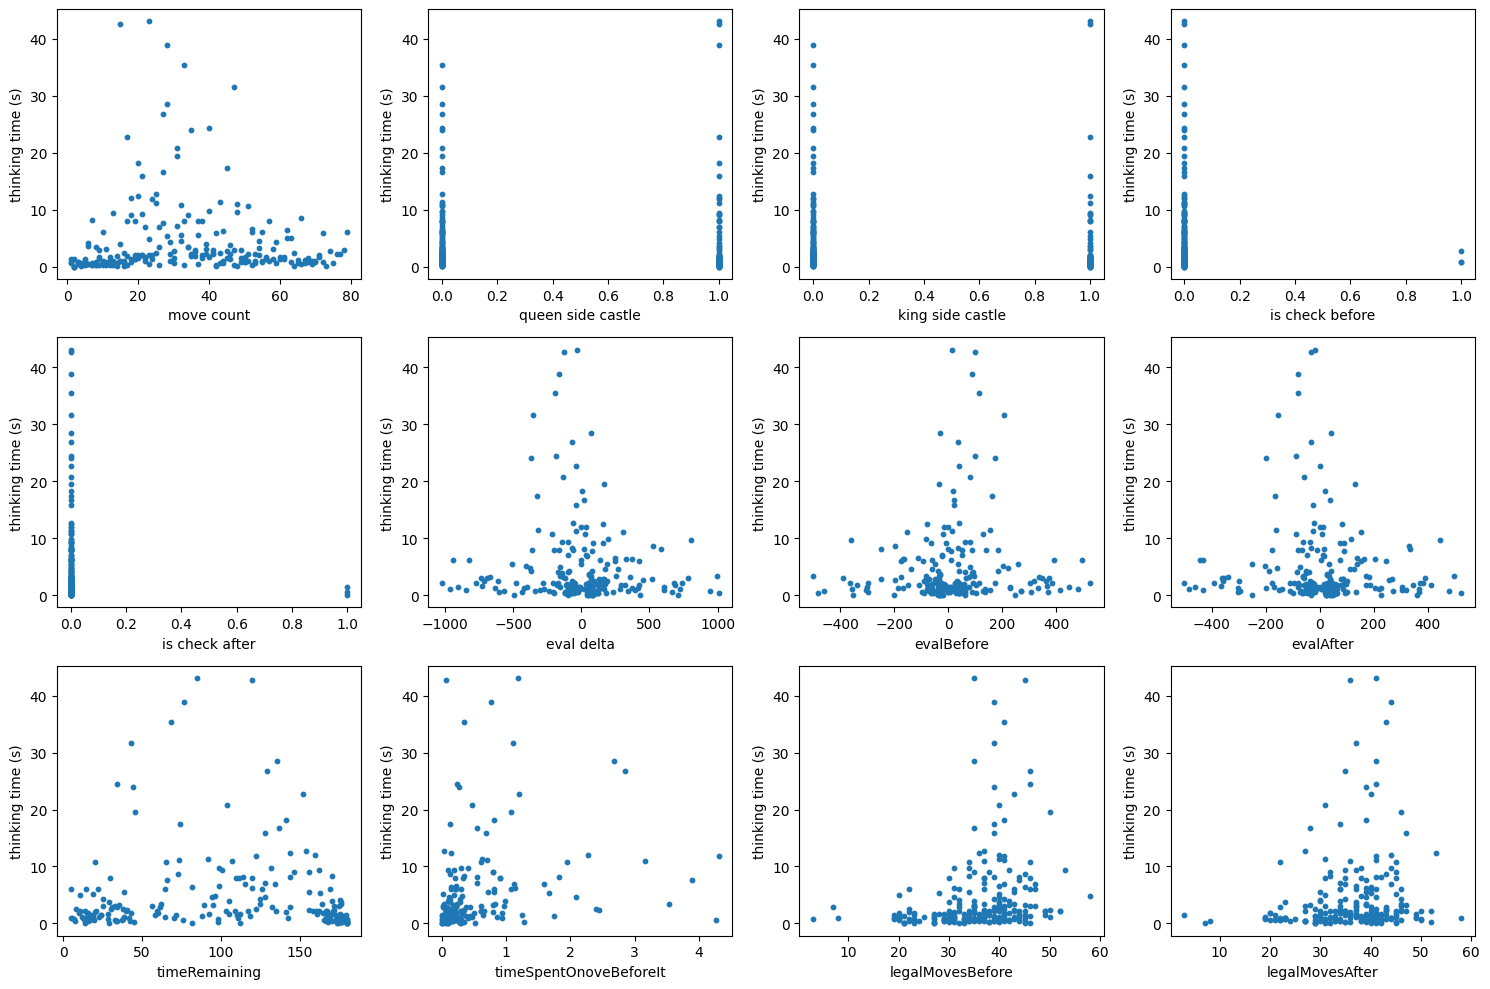

In [ ]:
# Plot each feature vs target in separate subplots
plt.figure(figsize=(15, 10))
for i in range(12):
    plt.subplot(3, 4, i + 1)  # 3 rows, 4 columns grid of plots
    plt.scatter(x_train[:, i], y_train, s=10)
    plt.xlabel(features[i])
    plt.ylabel("thinking time (s)")
    plt.tight_layout()

plt.show()

In [ ]:
# --- Build neural network ---

model = Sequential([
    Dense(128, input_dim=12, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')  # predicting continuous value
])

In [ ]:
# --- Compile ---
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 848.4141 - mae: 18.0319 
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 191.5432 - mae: 9.3368  
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 62.0596 - mae: 5.2705  
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 53.2848 - mae: 4.3967 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 42.6809 - mae: 4.2272 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 61.4484 - mae: 4.6404 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 41.1624 - mae: 3.6167 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 62.9435 - mae: 4.5218   
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40.9119 - mae: 3.7376 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47.5329 - mae: 4.0445 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 50.9971 - mae: 4.0592 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36.4893 - mae: 3.5664  
Epoch 13/100
8/8 ━━━━━━━━━━━━

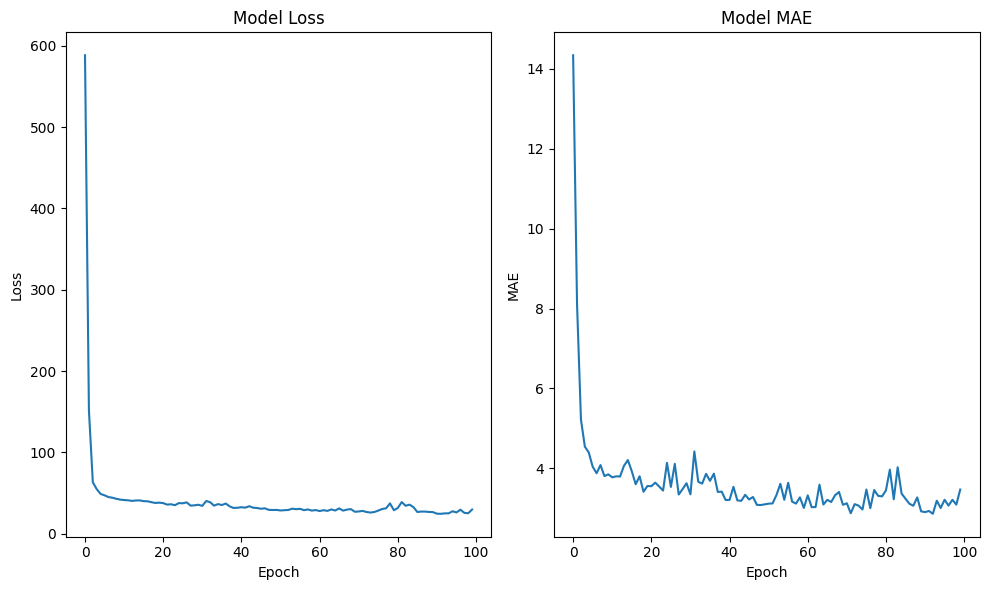

In [ ]:
# 5. Plot the training history
# The History object's .history attribute is a dictionary.
# It contains the loss and metrics for each epoch.
plt.figure(figsize=(10, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()

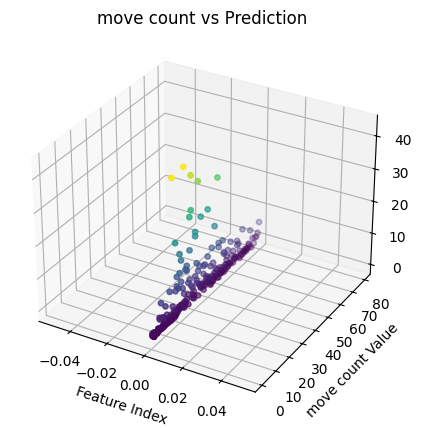

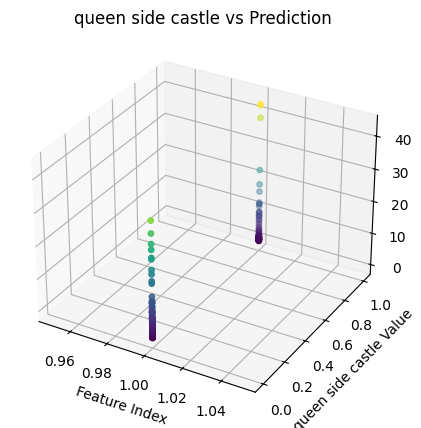

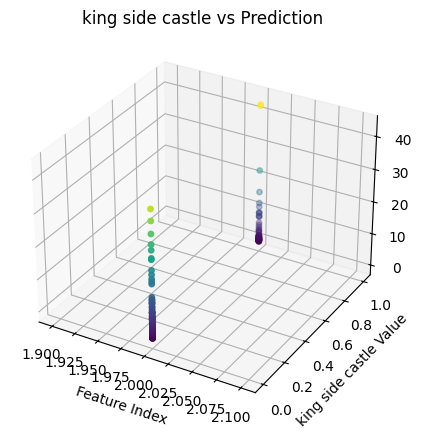

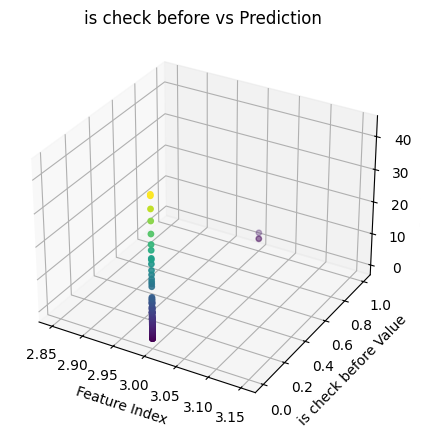

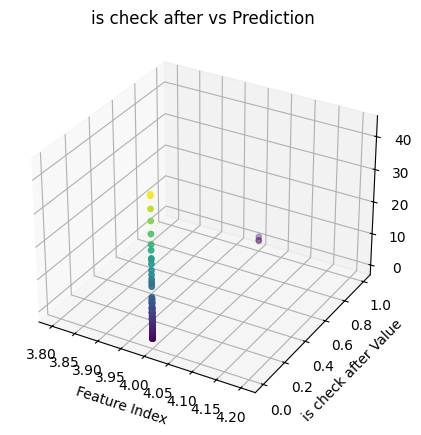

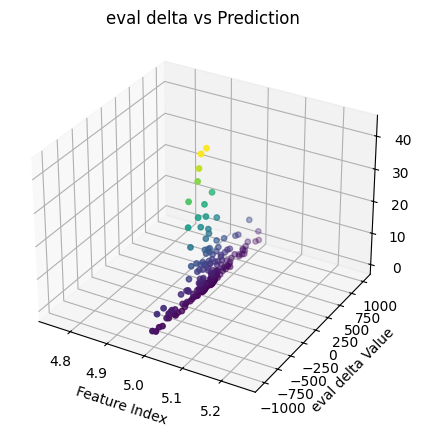

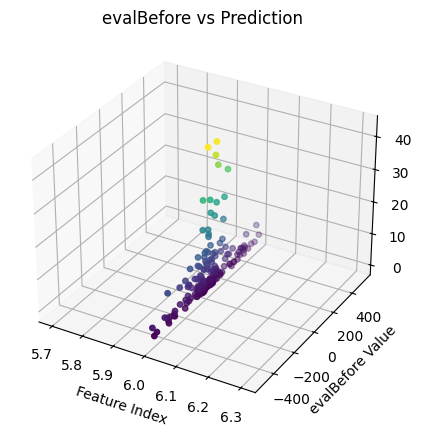

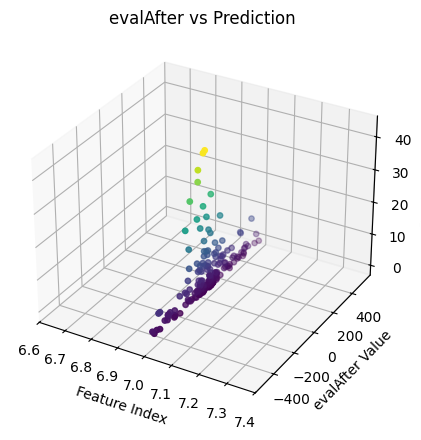

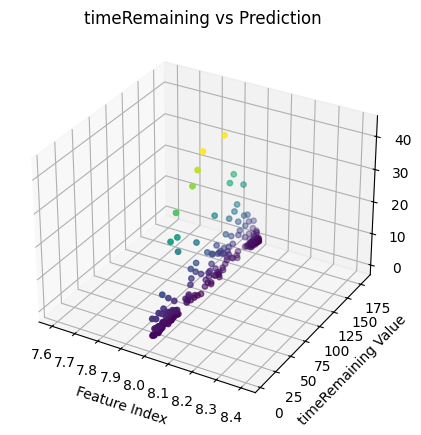

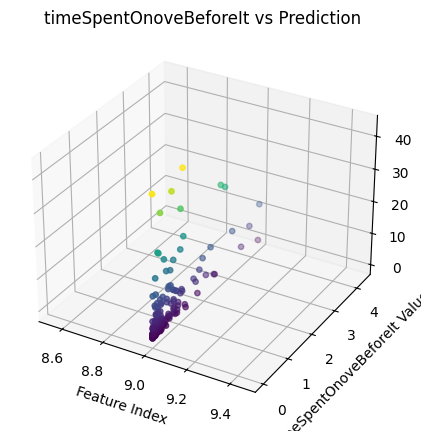

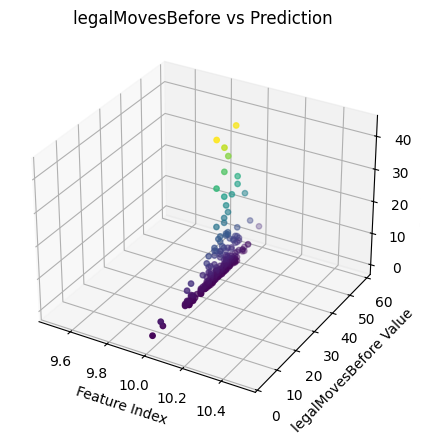

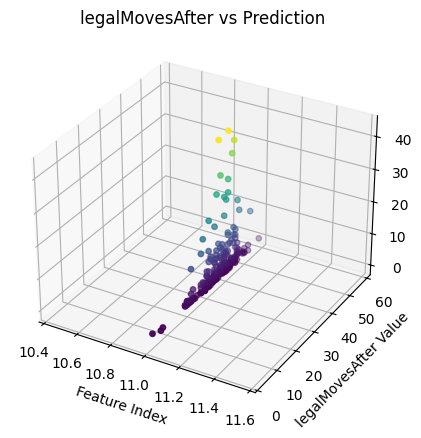

In [ ]:
for feature_idx in range(12):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(111, projection='3d')

    x_vals = np.full_like(x_train[:, feature_idx], feature_idx)  # feature index on X
    y_vals = x_train[:, feature_idx]                             # feature values on Y
    z_vals = y_train.flatten()                                     # predictions on Z

    ax.scatter(x_vals, y_vals, z_vals, c=z_vals, cmap='viridis', s=15)
    ax.set_xlabel("Feature Index")
    ax.set_ylabel(f"{features[feature_idx]} Value")
    ax.set_zlabel("Predicted ŷ")

    plt.title(f"{features[feature_idx]} vs Prediction")
    plt.show()

In [ ]:
df_filtered

,1,1.1,1.2,0,0.1,-23,0.2,-23.1,179,0.3,20,21,1.9
0,2,1,1,0,0,45,-23,22,178.7,0.00,21,29,1.3
1,3,1,1,0,0,-45,22,-23,178.1,0.07,29,23,0.9
2,4,1,1,0,0,64,-23,41,178.0,0.09,23,31,0.7
3,5,1,1,0,0,-75,41,-34,177.7,0.05,31,24,0.4
4,6,1,1,0,0,88,-34,54,177.5,0.04,24,34,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,19,1,1,0,0,-155,75,-80,110.0,1.24,45,36,1.4
224,20,1,1,0,0,162,-80,82,143.4,0.14,36,53,12.4
225,21,1,1,0,0,-143,82,-61,100.7,0.10,53,37,9.3
226,22,1,1,0,0,280,-61,219,142.4,0.93,37,58,1.0


In [ ]:
data = [91,	0	,0	,1	,5	, 5 ,	-5,	0	,63,	3,	25,	31		]
x = tf.constant([data], dtype=tf.float32)
predictions = model.predict( x )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [ ]:
predictions

array([[10.872392]], dtype=float32)

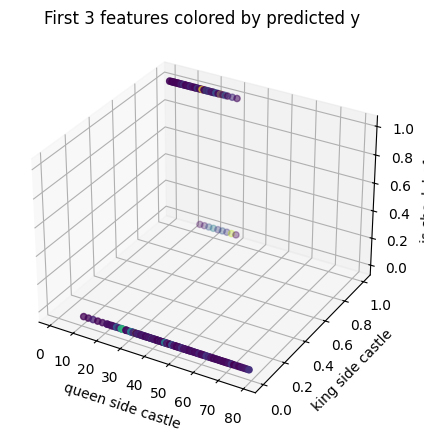

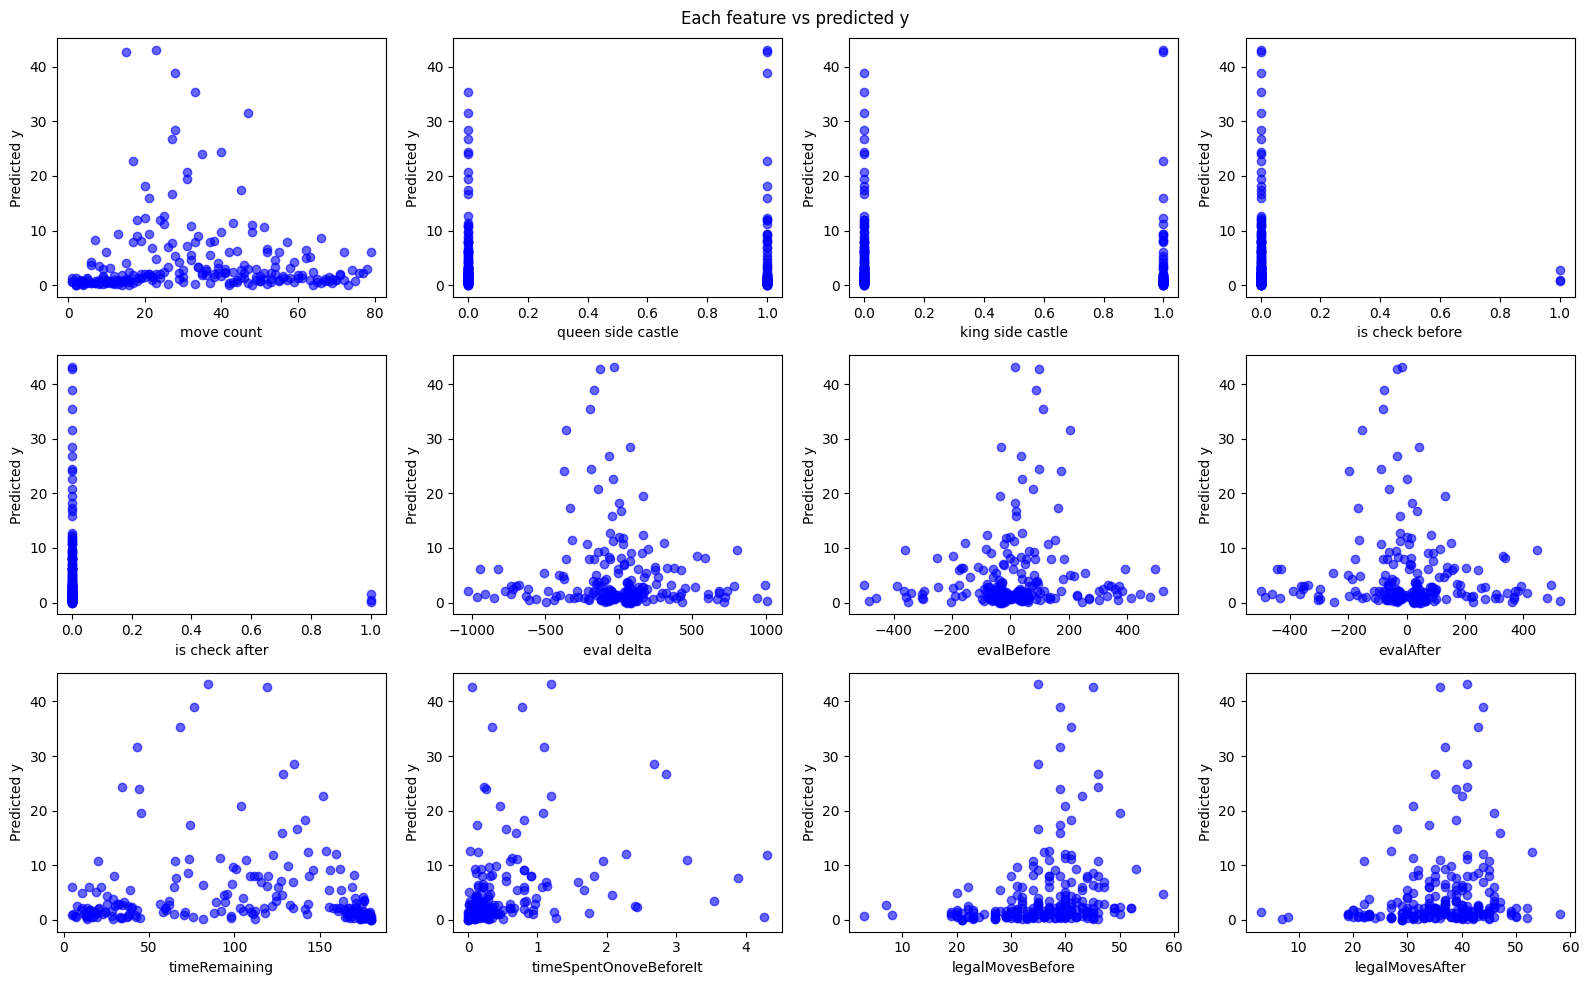

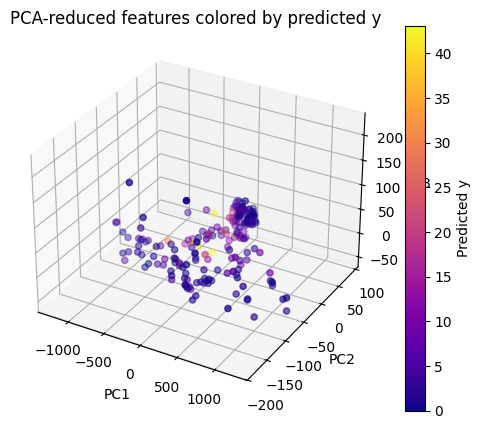

In [ ]:
# ---- 1. Plot first three features directly in 3D ----
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], x_train[:,2], c=y_train, cmap='viridis')
ax.set_xlabel(f'{features[1]}')
ax.set_ylabel(f'{features[2]}')
ax.set_zlabel(f'{features[3]}')
ax.set_title('First 3 features colored by predicted y')
plt.show()

# ---- 2. Plot each feature separately vs predicted y ----
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.flatten()
for i in range(12):
    axes[i].scatter(x_train[:, i], y_train, c='blue', alpha=0.6)
    axes[i].set_xlabel(f'{features[i]}')
    axes[i].set_ylabel('Predicted y')
plt.suptitle("Each feature vs predicted y")
plt.tight_layout()
plt.show()

# ---- 3. PCA to reduce 12D to 3D, then plot ----
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(x_train)

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_reduced[:,0], X_reduced[:,1], X_reduced[:,2],
                c=y_train, cmap='plasma')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA-reduced features colored by predicted y')
plt.colorbar(sc, ax=ax, label='Predicted y')
plt.show()